In [11]:
import deepxde as dde
import numpy as np

In [12]:
L = 5
m = 1
omega = 0.5

In [13]:
n = 2

In [14]:
def psi(x):
    constants = (1.0 / (np.sqrt(np.math.factorial(n) * 2 ** n))) * (((m * omega) / np.pi) ** 0.25)
    exponent = np.exp(-0.5 * m * omega * np.power(x, 2))
    hermite_coefficients = [0] * n + [1]
    hermite = np.polynomial.hermite.Hermite(hermite_coefficients)
    hermite_value = hermite(x * np.sqrt(m * omega))
    result = constants * exponent * hermite_value
    return result.astype(dde.config.real(np))

In [15]:
domain = dde.geometry.Interval(-L, L)

In [16]:
num_train = 16
num_test = 100
data = dde.data.Function(domain, psi, num_train, num_test)#, train_distribution='pseudo')

In [17]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [20] * 5 + [1], activation, initializer)

In [18]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
'compile' took 0.004674 s



In [19]:
loss_history, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.42e-01]    [1.47e-01]    [1.22e+00]    
1000      [1.04e-04]    [8.95e-05]    [3.01e-02]    
2000      [1.68e-05]    [1.37e-05]    [1.18e-02]    
3000      [5.33e-06]    [4.64e-06]    [6.85e-03]    
4000      [5.09e-06]    [5.28e-06]    [7.30e-03]    
5000      [6.64e-07]    [1.04e-06]    [3.24e-03]    
6000      [4.62e-07]    [1.06e-06]    [3.27e-03]    
7000      [4.75e-07]    [1.22e-06]    [3.51e-03]    
8000      [2.57e-05]    [2.72e-05]    [1.66e-02]    
9000      [4.25e-07]    [1.29e-06]    [3.60e-03]    
10000     [5.26e-07]    [1.48e-06]    [3.86e-03]    

Best model at step 9000:
  train loss: 4.25e-07
  test loss: 1.29e-06
  test metric: [3.60e-03]

'train' took 16.647458 s



Saving loss history to /home/piotr/repos/quant-chem-pinns/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/test.dat ...


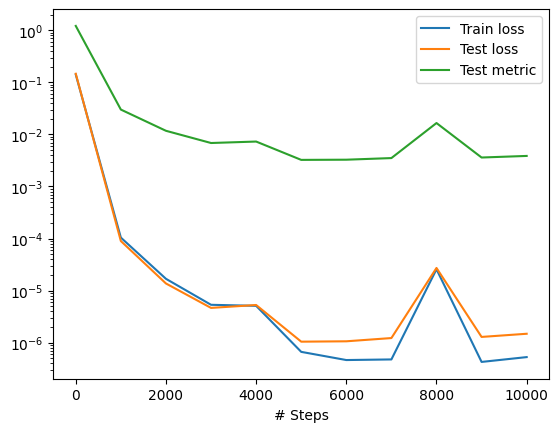

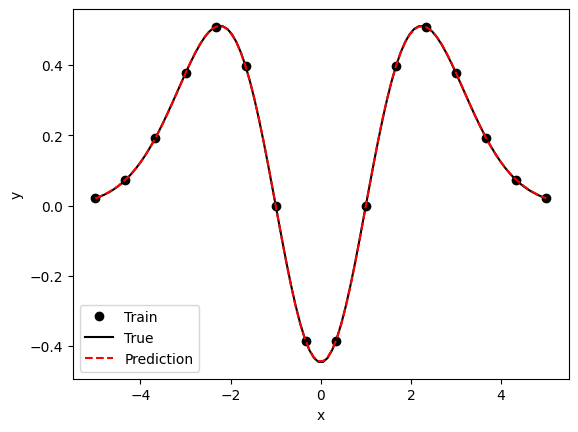

In [20]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)